In [54]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [55]:
X,y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=4)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6300, 18), (2700, 18), (6300,), (2700,))

In [58]:
train_scores, test_scores = list(), list()

In [59]:
values =[ i for i in range(1,21)]

In [60]:
for i in values:
  model= DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  train_scores.append(train_acc)
  test_scores.append(test_acc)

In [61]:
len(train_scores), len(test_scores)

(20, 20)

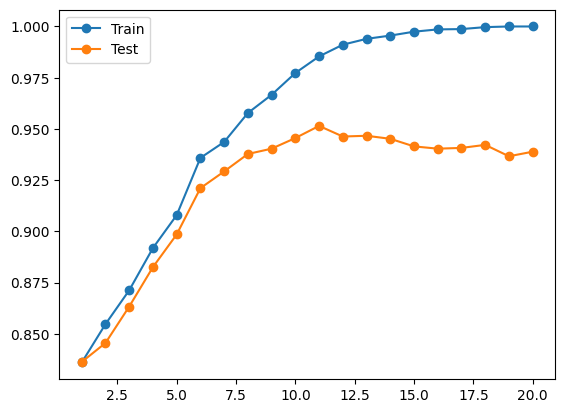

In [62]:
plt.plot(values, train_scores, 'o-', label='Train')
plt.plot(values, test_scores, 'o-', label='Test')
plt.legend()
plt.show()

lower values is overfitting and then higher values it is overfitting

How to prevent overfitting and underfitting problem

In [64]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {'criterion': ['gini','entropy'],'max_depth':[2,4,6,10,20],'min_samples_split':[5,10,20,50,100]}
clf= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,n_jobs= 1,scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [70]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=20)

The best crireion is entropy and use depth of 20

In [73]:
print(accuracy_score(y_train,clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test,clf.best_estimator_.predict(X_test)))

0.9804761904761905
0.9392592592592592
